In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lesson

In [2]:
cars = pd.read_csv(r'C:\Users\Ted\Documents\Mod9\Cars93.csv')

In [3]:
cars[['Weight','MPG.highway']].corr()

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


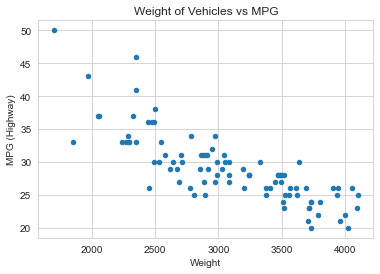

In [4]:
sns.set_style('whitegrid')

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
plt.show()

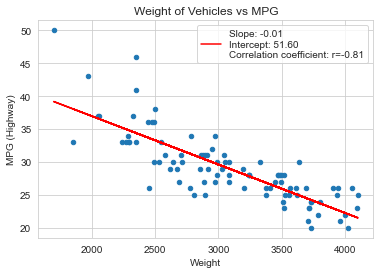

In [5]:
import scipy.stats
import matplotlib.pyplot as plt

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')

# Set up axis labels
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')

# Set up axis values
x = cars['Weight'].to_numpy()
y = cars['MPG.highway'].to_numpy()

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

# Display factors
line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

# Add the slope line
ax.plot(x, intercept + slope * x, label=line, color='red')

# Set up the legend
ax.legend(facecolor='white')

plt.show()

# Exercise

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cars = pd.read_csv(r'C:\Users\Ted\Documents\Mod9\Cars93.csv')

In [7]:
cars.drop(['Unnamed: 0', 'Man.trans.avail'], axis=1, inplace=True)

In [8]:
for col in cars.columns:
    print(f"{col}: {cars[col].isnull().sum()}")

Manufacturer: 0
Model: 0
Type: 0
Min.Price: 0
Price: 0
Max.Price: 0
MPG.city: 0
MPG.highway: 0
AirBags: 0
DriveTrain: 0
Cylinders: 0
EngineSize: 0
Horsepower: 0
RPM: 0
Rev.per.mile: 0
Fuel.tank.capacity: 0
Passengers: 0
Length: 0
Wheelbase: 0
Width: 0
Turn.circle: 0
Rear.seat.room: 2
Luggage.room: 11
Weight: 0
Origin: 0
Make: 0


In [9]:
for col in cars.describe().columns:
    col_mean = cars[col].mean()
    col_std = cars[col].std()
    
    print(col, 'outliers')
    
    for value in cars[col]:
        if abs(value - col_mean) > 3 * col_std:
            print(f'{value}, Z-score: {(value - col_mean) / col_std}')
    print('\r')

Min.Price outliers
45.4, Z-score: 3.2328035616503428
43.8, Z-score: 3.0498633943282014

Price outliers
61.9, Z-score: 4.388491303619023

Max.Price outliers
80.0, Z-score: 5.26733174808855

MPG.city outliers
46, Z-score: 4.205551831787016
42, Z-score: 3.493784187826702

MPG.highway outliers
50, Z-score: 3.922553103821614
46, Z-score: 3.1723270089004623

EngineSize outliers

Horsepower outliers

RPM outliers

Rev.per.mile outliers

Fuel.tank.capacity outliers
27.0, Z-score: 3.1516670537237967

Passengers outliers

Length outliers

Wheelbase outliers

Width outliers

Turn.circle outliers

Rear.seat.room outliers

Luggage.room outliers

Weight outliers



In [10]:
cars.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin', 'Make'],
      dtype='object')

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

In [12]:
for col in cars.columns:
    print(f'{col}: {cars[col].unique()}')

Manufacturer: ['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrylser' 'Chrysler'
 'Dodge' 'Eagle' 'Ford' 'Geo' 'Honda' 'Hyundai' 'Infiniti' 'Lexus'
 'Lincoln' 'Mazda' 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan'
 'Oldsmobile' 'Plymouth' 'Pontiac' 'Saab' 'Saturn' 'Subaru' 'Suzuki'
 'Toyota' 'Volkswagen' 'Volvo']
Model: ['Integra' 'Legend' '90' '100' '535i' 'Century' 'LeSabre' 'Roadmaster'
 'Riviera' 'DeVille' 'Seville' 'Cavalier' 'Corsica' 'Camaro' 'Lumina'
 'Lumina_APV' 'Astro' 'Caprice' 'Corvette' 'Concorde' 'LeBaron' 'Imperial'
 'Colt' 'Shadow' 'Spirit' 'Caravan' 'Dynasty' 'Stealth' 'Summit' 'Vision'
 'Festiva' 'Escort' 'Tempo' 'Mustang' 'Probe' 'Aerostar' 'Taurus'
 'Crown_Victoria' 'Metro' 'Storm' 'Prelude' 'Civic' 'Accord' 'Excel'
 'Elantra' 'Scoupe' 'Sonata' 'Q45' 'ES300' 'SC300' 'Continental'
 'Town_Car' '323' 'Protege' '626' 'MPV' 'RX-7' '190E' '300E' 'Capri'
 'Cougar' 'Mirage' 'Diamante' 'Sentra' 'Altima' 'Quest' 'Maxima' 'Achieva'
 'Cutlass_Ciera' 'Silhouette' 'Eigh

In [13]:
continuous_columns = ['Min.Price','Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity', 'Passengers', 'Length','Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room','Weight']
categorical_columns = ['Manufacturer', 'Model', 'Type','Cylinders','Origin', 'Make']

In [14]:
continuous_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
continuous_imputed_df = pd.DataFrame(continuous_imputer.fit_transform(cars[continuous_columns]), columns= continuous_columns)
continuous_imputed_df

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,11.000000,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.000000,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.000000,3375.0
3,30.8,37.7,44.6,19.0,26.0,2.8,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,70.0,37.0,31.0,17.000000,3405.0
4,23.7,30.0,36.2,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.000000,3640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17.0,21.0,2.5,109.0,4500.0,2915.0,21.1,7.0,187.0,115.0,72.0,38.0,34.0,13.890244,3960.0
89,17.6,20.0,22.4,21.0,30.0,2.0,134.0,5800.0,2685.0,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.000000,2985.0
90,22.9,23.3,23.7,18.0,25.0,2.8,178.0,5800.0,2385.0,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.000000,2810.0
91,21.8,22.7,23.5,21.0,28.0,2.3,114.0,5400.0,2215.0,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.000000,2985.0


In [16]:
for col in continuous_columns:
    cars[col] = continuous_imputed_df[col]
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     float64
 7   MPG.highway         93 non-null     float64
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     float64
 13  RPM                 93 non-null     float64
 14  Rev.per.mile        93 non-null     float64
 15  Fuel.tank.capacity  93 non-null     float64
 16  Passengers

In [17]:
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [18]:
categorical_imputed_df = pd.DataFrame(categorical_imputer.fit_transform(cars[categorical_columns]), columns=categorical_columns)
categorical_imputed_df

,Manufacturer,Model,Type,Cylinders,Origin,Make
0,Acura,Integra,Small,4,non-USA,Acura Integra
1,Acura,Legend,Midsize,6,non-USA,Acura Legend
2,Audi,90,Compact,6,non-USA,Audi 90
3,Audi,100,Midsize,6,non-USA,Audi 100
4,BMW,535i,Midsize,4,non-USA,BMW 535i
...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,5,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,4,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,6,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,4,non-USA,Volvo 240


In [19]:
for col in categorical_columns:
    cars[col] = categorical_imputed_df[col]
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     float64
 7   MPG.highway         93 non-null     float64
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     float64
 13  RPM                 93 non-null     float64
 14  Rev.per.mile        93 non-null     float64
 15  Fuel.tank.capacity  93 non-null     float64
 16  Passengers

In [20]:
for col in cars:
    print(f"{col} missing values: {cars[col].isnull().sum()}")

Manufacturer missing values: 0
Model missing values: 0
Type missing values: 0
Min.Price missing values: 0
Price missing values: 0
Max.Price missing values: 0
MPG.city missing values: 0
MPG.highway missing values: 0
AirBags missing values: 0
DriveTrain missing values: 0
Cylinders missing values: 0
EngineSize missing values: 0
Horsepower missing values: 0
RPM missing values: 0
Rev.per.mile missing values: 0
Fuel.tank.capacity missing values: 0
Passengers missing values: 0
Length missing values: 0
Wheelbase missing values: 0
Width missing values: 0
Turn.circle missing values: 0
Rear.seat.room missing values: 0
Luggage.room missing values: 0
Weight missing values: 0
Origin missing values: 0
Make missing values: 0


In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     float64
 7   MPG.highway         93 non-null     float64
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     float64
 13  RPM                 93 non-null     float64
 14  Rev.per.mile        93 non-null     float64
 15  Fuel.tank.capacity  93 non-null     float64
 16  Passengers

In [22]:
cars = pd.get_dummies(cars, columns=['Manufacturer','Model','Type','Origin','Make','AirBags','DriveTrain','Cylinders'], drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
X = cars.drop("MPG.highway", axis=1)
y = cars["MPG.highway"]

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.75, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
reg = LinearRegression().fit(X_train1, y_train1)

In [27]:
reg.score(X,y)

0.8826788948898008

In [28]:
X_test1.columns[0]

'Min.Price'

In [29]:
x_predictions = reg.predict(X_test1)
residuals = x_predictions - y_test1

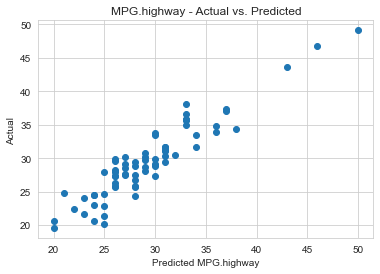

In [30]:
sns.set_style('whitegrid')

plt.scatter(y_test1, x_predictions)
plt.title('MPG.highway - Actual vs. Predicted')
plt.xlabel('Predicted MPG.highway')
plt.ylabel('Actual ')
plt.show()

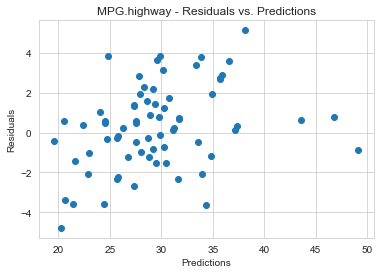

In [31]:
sns.set_style('whitegrid')

plt.scatter(x_predictions, residuals)
plt.title('MPG.highway - Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [32]:
intercept = reg.intercept_
coefficients = reg.coef_

In [33]:
print(f'y = {intercept} + ')
for index in range(0, len(coefficients)):
    print(f'(":.2f".format({coefficients[index]})*{X_test1.columns[index]}')

y = 2.763251951943758 + 
(":.2f".format(-0.003629768175988023)*Min.Price
(":.2f".format(-0.02380662928731947)*Price
(":.2f".format(-0.013144093845751883)*Max.Price
(":.2f".format(0.7459348301838284)*MPG.city
(":.2f".format(0.039003688122578456)*EngineSize
(":.2f".format(-0.005020778038558743)*Horsepower
(":.2f".format(-0.000508726749773869)*RPM
(":.2f".format(0.0004130946949090636)*Rev.per.mile
(":.2f".format(0.03198206605871268)*Fuel.tank.capacity
(":.2f".format(-0.5804563250596634)*Passengers
(":.2f".format(0.11512049338346919)*Length
(":.2f".format(0.19843047544755726)*Wheelbase
(":.2f".format(0.032096278298166026)*Width
(":.2f".format(-0.4560019533506171)*Turn.circle
(":.2f".format(-0.10235885450971838)*Rear.seat.room
(":.2f".format(0.17632260300344937)*Luggage.room
(":.2f".format(-0.0034850305293662176)*Weight
(":.2f".format(1.1102230246251565e-16)*Manufacturer_Audi
(":.2f".format(-5.551115123125783e-17)*Manufacturer_BMW
(":.2f".format(0.0)*Manufacturer_Buick
(":.2f".format(0.0755